# Lesson 2.2 Expectation Maximization Using Gaussian Mixture Models
---

## Introduction

Many real world problems have hidden variables that are not observable in the data. An example that is given in the AIMA text book, is as follows: Medical records  show observed symptoms, the diagnosis, treatment, and the outcome of the treatment. However, it does not include the direct observation of the disease. The expectation maximization algorithm takes the observable data and seeks to find and learn from these hidden variables. One method to do this is by gaussian clustering also known as a mixture of gaussians. The clustering presumes the data is generated from a mixture distribution, *P* with *k* components. Let the random variable *C* denote the component, with values 1-*k*. Then the distribution is given by:

$$P(x) = \sum_{i=1}^{k} P(C = i)*P(x | C = i)$$

where x represnts the values of the attributes for a datum point. The parameters of a mixture of gaussians are the component weight $w_{i} = P(C = i)$, the mean of the component $\mu_{i}$, and the covariance of the component $\sum_{i}$. 

## The Algorithm

The Expectation Maximization (as you might have guessed) consists of 2 main steps: The E-Step and the M-Step. In the E-Step or the *Expectation* step, we compute the probability that data $x_{j}$ was generated by $C_{i}$. In other words, based on current observations, what is the probability a data point was generated by a specific component. By using Baye's Rule, we get the following:

$$P_{ij} = \alpha P(x_{j} | C = i) * P(C=i)$$

where $P(x_{j} | C = i)$ is the probability at $x_{j}$ of the ith Gausian and $P(C = i)$ represents the weight parameter for the ith gaussian. Next, we find the number of data points asigned to $C_{i}$ is represented as $n = \sum_{j} P_{ij}$.

The M-Step or *Maximization* step computes the new mean, covariance, and weights using the following sequence:

>1. $\sum_{j} P_{ij} * x_{j} / n_{i} \to \mu_{i}$  
>2. $\sum_{j} P_{ij} * (x_{j} - \mu_{i}) * (x_{j} - \mu_{i}) * T/n_{i} \to /sum_{i}$  
3. $w_{i} n_{j} \to w_{i}$

As stated previously, the EM algorithm seeks to find the hidden variables and paramters of a data set. The method by which it does this is by utilizing clustering. For each iteration through, the E-Step generates the liklihood of a data point belonging to a cluster or component. Then the M-Step maximizes this likelihood and then restarts the iteration. The iteration will stop when the 2 steps have converged. Below is an example of the EM Algorithm at work on data generated from Old Faithful at Yellowstone National Park which seeks to find the data corresponding to 2 separate modes of the geyser.

![oldFaithful](./images/oldFaithful.gif)

### Psuedocode

```python
def EM(data, nComponents):
  means,variances,weights = Initialize(data)
  converged = False
    
  while not converged:
    #Expectation Step
    probs = ComputeLikelihood(nComponents,data,means,variances,weights)
        
    #Maximization Step
    means,variance,weightd = ComputeDistribution(nComponents,data,probs)
        
    convergence = CheckConvergence(Probability, PrevProb)
    prevProb = Probability
```

## Visual Example: Image Decomposition

This example will be performing image decomposition using EM. It will take the image below, determine the data belonging to a specified number of components, and will re-write the image using the means of the components. Below is the picture that we will be using.

![gs](./images/grayscale.png)

A Jupyter Widget

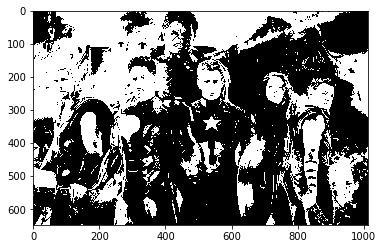

In [2]:
import matplotlib.pyplot as plt
from matplotlib import image as img
import ipywidgets as widgets
import matplotlib.cm as cm
import numpy as np
from EM import EM_Gaussian

#Widgets
NumComponents = widgets.IntSlider(value=2,min=2,max=20,step=1)
runButton = widgets.Button(description='Run Algorithm')
bx1 = widgets.HBox([widgets.Label('Number of Components:'),NumComponents])
            
def RunEM(b):
    grayscale = img.imread('./images/grayscale.png')
    em = EM_Gaussian(grayscale.flatten(),NumComponents.value)
    em.Initialize()
    em.Run()
    grayscale_out = np.reshape(em.Segment(),np.shape(grayscale))
    plt.imshow(grayscale_out,cmap=plt.get_cmap('gray'))
    plt.show()

#Display Widgets
runButton.on_click(RunEM)
widgets.VBox([bx1,runButton])

## Aeromechanical Example: Find Sensor Placement

As we saw in the lesson on the genetic algorithm, we can take advantage of the EM algorithm to find locations on a model to place our sensors. In this example:

>  
1. An NxM matrix is used to represent the model
2. Each cell in the matrix represents a node
3. A sensor can be mapped to each node in the matrix
4. Each cell contains a strain value corresponding to each Dynamic Mode Shape

Below is an example matrix displaying Strains for 3 Mode Shapes where a value of 1 represents max strain and the colors represent the gradient.

### Mode 1:
![mode1](./images/mode1.PNG)

### Mode 2:
![mode2](./images/mode2.PNG)

### Mode 3:
![mode3](./images/mode3.PNG)

Based on input from the supplied widgets, the example will generate this data randomly in the node matrix. The example will re-use the EM_Gaussian class defined in the previous example. The specified number of sensors specified represent the number of components for the algorithm. The algorithm can be modified to create multivariate gaussian distrubutions to more precisely represent the data (i.e. 4 dimensional x,y,z coordinates of the node and the combined mode amplitude at the node). However, for simplicity and demonstration, we are going to stay with a single dimension gaussian using the resultant strains of these mode shapes overlayed on one another. When we do this, we get the following combined mode shape node matrix from the above examples. This is simply the sum of the matrices. The result will output the calculated mean for each component which represents the clusters of "pixels" in the matrix.

### Combined Mode Shape:
![combined](./images/combined.PNG)

In [3]:
from EM import EM_Gaussian

#Widgets
NumSensors = widgets.IntSlider(value=2,min=2,max=20,step=1)
NumModes = widgets.IntSlider(value=3,min=2,max=20,step=1)
NumRows = widgets.IntSlider(value=20,min=10,max=2000,step=1)
NumCols = widgets.IntSlider(value=20,min=10,max=2000,step=1)
Decrement = widgets.FloatSlider(value=0.2,min=0.01,max=0.9,step=0.01)
runButton2 = widgets.Button(description='Run Algorithm')
bx1 = widgets.HBox([widgets.Label('Number of Sensors:'),NumSensors])
bx2 = widgets.HBox([widgets.Label('Number of Modes:'),NumComponents])
bx3 = widgets.HBox([widgets.Label('Number of Rows:'),NumRows])
bx4 = widgets.HBox([widgets.Label('Number of Columns:'),NumCols])
bx5 = widgets.HBox([widgets.Label('Decrement:'),Decrement])
means = widgets.Text(description='Result Means')

def GenerateData(rows,cols,nmodes,decrement):
    data = np.zeros((rows,cols),dtype=float)
    for m in range(nmodes):
        modeData = np.zeros((rows,cols),dtype=float)
        rrow = np.random.randint(0,rows)
        rcol = np.random.randint(0,cols)
        modeData[rrow][rcol] = 1.0
        for r in range(rows):
            for c in range(cols):
                if r==rrow and c == rcol:
                    continue
                distance = max(abs(rrow-r),abs(rcol-c))
                modeData[r][c] = 1.0 - (distance*decrement)
                if modeData[r][c] < 0:
                    modeData[r][c] = 0
        data = np.add(data,modeData)
    return data

def Optimize(b):
    data = GenerateData(NumRows.value,NumCols.value,NumModes.value,Decrement.value)
    #We want to ignore 0 data and flatten the array
    dataf = data.flatten()
    dataf = dataf[np.where(dataf>0)]
    em = EM_Gaussian(dataf,NumSensors.value)
    em.Initialize()
    em.Run()
    means.value = str(em.means)

#Display Widgets
runButton2.on_click(Optimize)
widgets.VBox([bx1,bx2,bx3,bx4,bx5,runButton2,means])  

A Jupyter Widget

## Review

This lesson focused on the EM algorithm using gaussian mixture models. This lesson covered the purpose for EM and what exactly it its. The lesson also provided example using EM. The first example demontrated image decomposition. EM is useful her because it can find the components that make up the imge and break te image down into a simpler form. This process is used frequently in image analysis and recognition. The second example showed a use in the aeromechanical testing industry. While the method show was simplified, by using multivariate gaussians, the strain ontour can be better represented, and a more precise answer given. Please go over the algorithm and experiment with the examples provided.

## Resources

Russel, S. J., & Norvig, P. (2015). Learnin Probabilistic Models. In Artificial intelligence: A modern approach (3rd ed., pp. 831-840). Noida, India: Pearson India Education Services Pvt.

Expectation–maximization algorithm. (2018, July 01). Retrieved from https://en.wikipedia.org/wiki/Expectation–maximization_algorithm 